**Table of contents**<a id='toc0_'></a>    
- 1. [Pareto optimal bundles, $C$, given initial endownments](#toc1_)    
- 2. [Errors from $p_1 \in \mathcal{P}_1$](#toc2_)    
- 3. [Market clearing price](#toc3_)    
- 4. [Assignment 4](#toc4_)    
- 5. [Individual optimization](#toc5_)    
  - 5.1. [Optimizing under C](#toc5_1_)    
  - 5.2. [Optimizing over the infinite set between 0 and 1](#toc5_2_)    
- 6. [Assignment 6](#toc6_)    
- 7. [$W$](#toc7_)    
- 8. [Market equilibrium for each $\omega^A \in \mathcal{W}$](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Preliminaries

In [ ]:
import matplotlib.pyplot as plt
from scipy import optimize 
import scipy.stats 

import numpy as np
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})


%load_ext autoreload
%autoreload 2

In [ ]:
# import modelclass from ExchangeEconomy.py
from ExchangeEconomy import ExchangeEconomyClass

## 1. <a id='toc1_'></a>[Allocations $(C)$ given initial endownments](#toc0_)

In an exchange economy of this type where both agents have convex utility functions, the solutions lie on the contract curve, which is where $MRS^A = MRS^B$. 

This subassignment tasks us to find the pareto optimal allocations in relation to the initial endownments, which is different since the initial endownments establishes base-utility levels, thus excluding part of the edgeworthbox as possible solutions. 

As we will see, the edgeworth box depicting the set C, is exactly the set between each agents indifference curves when they go through the endownment bundle. 

Ultimately, the agents should trade such that they end up at any point on the contractcurve, that lies within C, this is known as the **core allocation**. 

In [105]:
model = ExchangeEconomyClass()

N = 75

w1A = 0.8
w2A = 0.3

x1A = np.linspace(0,1,N+1)
x2A = x1A.copy()

x1possible = []
x2possible = []

for x1 in x1A:
    for x2 in x2A:
        if model.utility_A(x1,x2) >= model.utility_A(w1A,w2A) and model.utility_B((1-x1),(1-x2)) >= model.utility_B(1-w1A,1-w2A):
            x1possible.append(x1)
            x2possible.append(x2)

print(x1possible[0:5])


[0.08, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334, 0.09333333333333334]


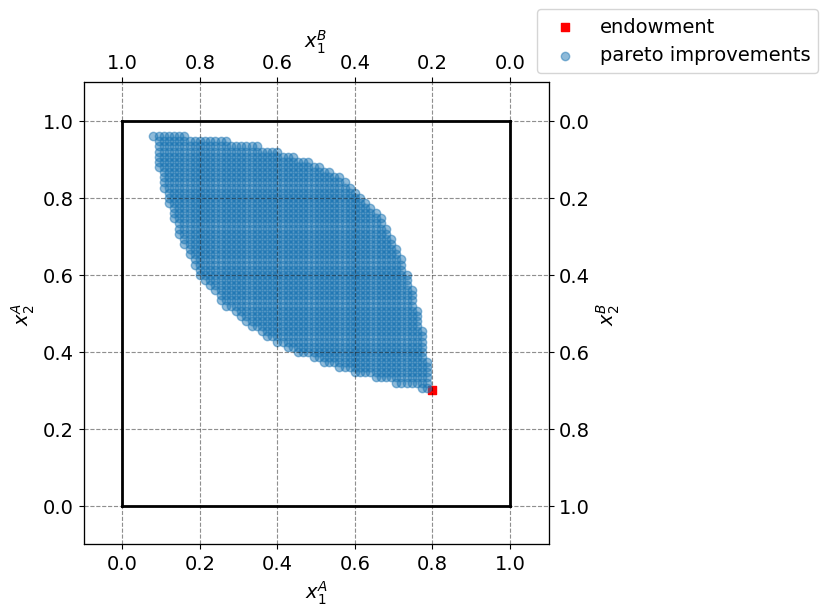

In [106]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='red',label='endowment')
ax_A.scatter(x1possible,x2possible, alpha=0.5, label='pareto improvements')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='lower right', bbox_to_anchor=(1.6,1.0));

## 2. <a id='toc2_'></a>[Errors from $p_1 \in \mathcal{P}_1$](#toc0_)

In [ ]:
# Initialize empty list
p1 = []

# Fill the list by looping
for i in range(N+1):
    p1.append(0.5 + 2*i/N)

# Initialize empty list
error = []

# Calculate errors (eps1,eps2) using the check_market_clearing func from ExchangeEconomy.py and filling list
for i in p1:
    error.append(model.check_market_clearing(i))

# check 
print(error[0:5])

# unpack tuple list error 
error1,error2 = zip(*error)

# plot of errors 
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_C = fig.add_subplot(1, 1, 1)

ax_C.set_ylabel("Error under market clearing")
ax_C.set_xlabel("$p_1$")
ax_C.set_title("Market Clearing errors under $\mathcal{P}_1$")

ax_C.plot(p1, error1, label = '$\epsilon_1(p,\omega)$')
ax_C.plot(p1, error2, label = '$\epsilon_2(p,\omega)$')
ax_C.legend()

## 3. <a id='toc3_'></a>[Market clearing price](#toc0_)

The market clearing price, is the choice of $p_1$, that make both errors as low as possible, preferably close to zero.  

## 4. <a id='toc4_'></a>[Assignment 4](#toc0_)

## 5. <a id='toc5_'></a>[Individual optimization](#toc0_)

In this part of the assignment, agent A maximizes their own utility under the restriction that agent B is not worse of than in the initial endowment. The prices are taken as given, and allocation is defined as a bundle of goods.

$[(x_1^A,x_2^A),(x_1^B,x_2^B)]$

In 5.1 the problem, is for A to maximize their utility by choosing $x_1^A, x_2^A$, given prices, under the set of possible pareto optimal bundles in $C$. 

While in 5.2 we disregard the set $C$.


### 5.1. <a id='toc5_1_'></a>[Optimizing under C](#toc0_)

In [ ]:
# Agent A optimizes utility of x1A, x2A under the set C

# Model params (not needed)

alpha = 1/3 
beta = 1-alpha 

# Brute force initial conditions
uAmax = -np.inf
x1best = -np.inf
x2best = -np.inf

# loops
for x1 in x1possible:
    for x2 in x2possible:
        uAnew = model.utility_A(x1,x2)
        if model.utility_A(x1,x2) > uAmax and model.utility_B(1-x1,1-x2) >= model.utility_B(1-par.w1A,1-par.w2A):
            uAmax = uAnew
            x1best = x1 
            x2best = x2

print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1best:.3f},{x2best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1best,1-x2best):.3f}: (x1B,x2B) = ({1-x1best:.3f},{1-x2best:.3f})')

# using a solver 

# sol_case = optimize.minimize(model.utility_A(x1possible, x2possible)) 

### 5.2. <a id='toc5_2_'></a>[Optimizing over the infinite set between 0 and 1](#toc0_)

In [ ]:
# Agent A optimizes utility under no further restrictions
# This is an almost identical problem, the only change, is x1A, x2A exist on the real axis in [0:1]
# Thus if N was sufficiently large in 5.1, the same solution should appear, if not, the opposite.

# Using brute force again

# Setting high N, simulating large set of numbers in [0:1]
N = 2000

# Set initial conditions
x1possible = np.linspace(0,1,N)
x2possible = np.linspace(0,1,N)
uAmax = -np.inf
x1best = -np.inf
x2best = -np.inf

# Just checking utility of B from initial endownments. 
print(f'$u^B(w1B,w2B)$ = {model.utility_B(1-par.w1A, 1-par.w2A):.3f}')

# similar loop as 5.a 
for x1A in x1possible:
    for x2A in x2possible:
        uAnew = model.utility_A(x1A,x2A)
        if model.utility_A(x1A,x2A) > uAmax and model.utility_B(1-x1A,1-x2A) >= model.utility_B(1-par.w1A,1-par.w2A):
            uAmax = uAnew
            x1best = x1 
            x2best = x2

print(f'Utility A max = {uAmax:.3f}: (x1A,x2A) = ({x1best:.3f},{x2best:.3f})')
print(f'Utility B max = {model.utility_B(1-x1best,1-x2best):.3f}: (x1B,x2B) = ({1-x1best:.3f},{1-x2best:.3f})')

The results of 5.2 hints at a minor pareto improvement, suggesting that the original set had enough elements between 0 and 1 to be precise.

## 6. <a id='toc6_'></a>[Assignment 6](#toc0_)

## 7. <a id='toc7_'></a>[$W$](#toc0_)

This assignment will illustrate a set $W$, using python psuedo rng. 

$W=\{(\omega_1^A,\omega_2^A) | \omega_1^A \sim \mathcal{U}(0,1), \omega_2^A \sim \mathcal{U}(0,1)  \}$

The distribution isn't specified, only its moments, we assume it to be a uniform distribution between 0 and 1. 

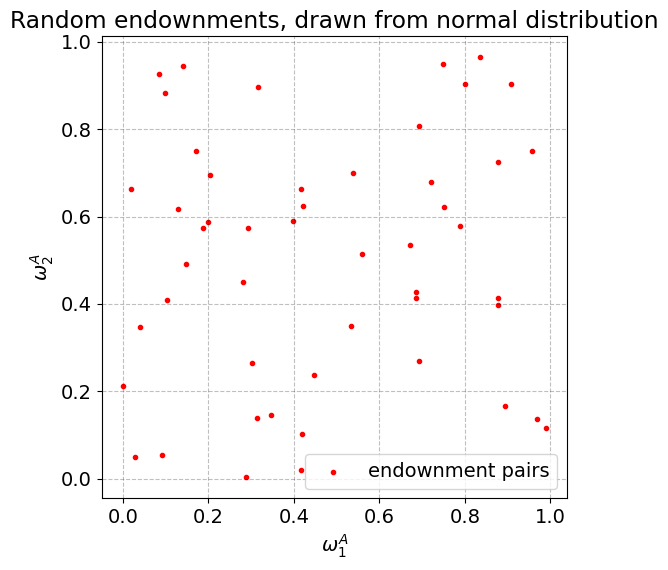

In [104]:
# Set seed for reproduceability 
np.random.seed(1)

# w1A = np.random.normal(loc=0,scale=1,size=50)
# w2A = np.random.normal(loc=0,scale=1,size=50)

# Generate vectors from random draws
w1A = np.random.uniform(low=0,high=1,size=50)
w2A = np.random.uniform(low=0,high=1,size=50)

# Create figure
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_D = fig.add_subplot(1, 1, 1)

ax_D.set_xlabel("$\omega_1^A$")
ax_D.set_ylabel("$\omega_2^A$")
ax_D.set_title("Random endownments, drawn from normal distribution")

ax_D.scatter(w1A, w2A, label = "endownment pairs", color="red", marker=".")
ax_D.legend()

## 8. <a id='toc8_'></a>[Market equilibrium for each $\omega^A \in \mathcal{W}$](#toc0_)

In [ ]:
# Not finished

# define objective function
x1A = model.demand_A(p1)
x2A = model.demand_B(p1)

def objective(x1A,x2A):
    agg_util = -model.utility_A(x1A,x2A)+model.utility_B(1-x1A,1-x2A)
    return agg_util

# define constraints and bounds 
def constraint1(x1A,x2A,w1A,w2A):
    par1 = model.utility_A(x1A,x2A) >= model.utility_A(w1A,w2A)
    return par1

def constraint2(x1A,x2A,w1A,w2A):
    par2 = model.utility_A(1-x1A,1-x2A) >= model.utility_A(1-w1A,1-w2A)
    return par2

con1 = {"type":"ineq", "fun":constraint1}
con2 = {"type":"ineq", "fun":constraint2}

cons = [con1,con2]

b = (0,1)
bounds = [b,b] 

# Check market clearing good 1 

# use solver 
x0 = [w1A,w2A,1-w1A,1-w2A]
sol = optimize.minimize(objective, x0, method="nelder-mead", bounds=bounds, constraints=cons)

# save good bundles 

